In [17]:
%run constants.py # Correr esta celda en caso de que se haya actualizado alguna constante dentro del json

In [3]:
import os 
import numpy as np 
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt 

import tools

# Graficador de Densidad Atómica

### Extracción de datos

In [22]:
with open('constants.json', 'r') as openfile:
    vals = json.load(openfile) # Reading constants from json file

In [26]:
dates = [20241120, 20250410]
date = dates[1]
fit_data = pd.read_csv(f'temp_records/{date}/fit_records.csv', names = ['T', 'N', 'x0']) 

### Representación Gráfica

In [45]:
'''CURVAS TEÓRICAS'''
x = np.arange(298.15,398.15, 1)
NES = tools.density(vals['Rb_liquid_NES'], x, 1)
ALC = tools.density(vals['Rb_liquid_ALC'], x, 1)

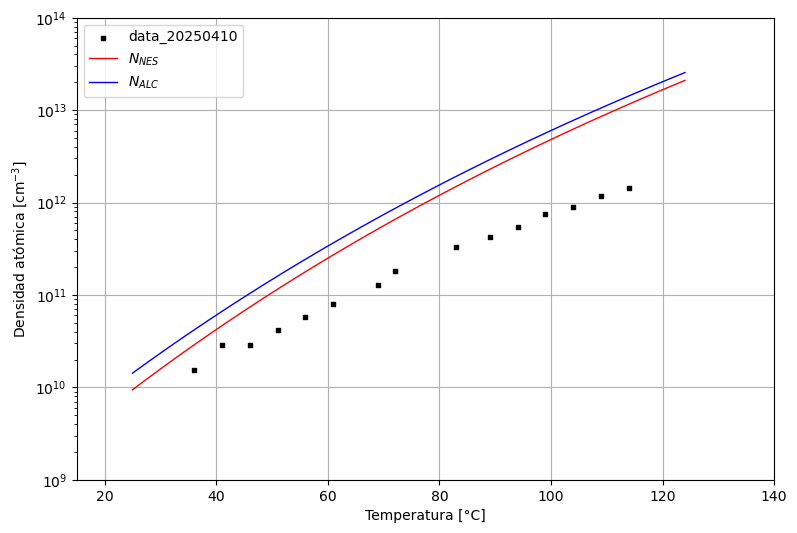

In [51]:
fig = plt.figure(figsize=(9,6))
plt.yscale('log')
plt.ylim(1e9,1e14)
plt.xlim(15,140)

plt.scatter(fit_data['T']-273.15, fit_data['N']*1e-6, label = f'data_{date}', marker = "s", color = "k", s = 10) # Datos experimentales

plt.plot(x-273.15, NES*1e-6,label = '$N_{NES}$', color =  "r", linewidth = 1) # Curvas teóricas
plt.plot(x-273.15, ALC*1e-6, label = '$N_{ALC}$', color = "b", linewidth = 1)

plt.xlabel('Temperatura [°C]')
plt.ylabel('Densidad atómica [cm$^{-3}$]')
plt.legend()
plt.grid()